## 7.3.4 Exercise

## Variation Exercises

1.	Explore the distribution of each of the x, y, and z variables in diamonds. What do you learn? Think about a diamond and how you might decide which dimension is the length, width, and depth.

In [2]:
library(tidyverse)

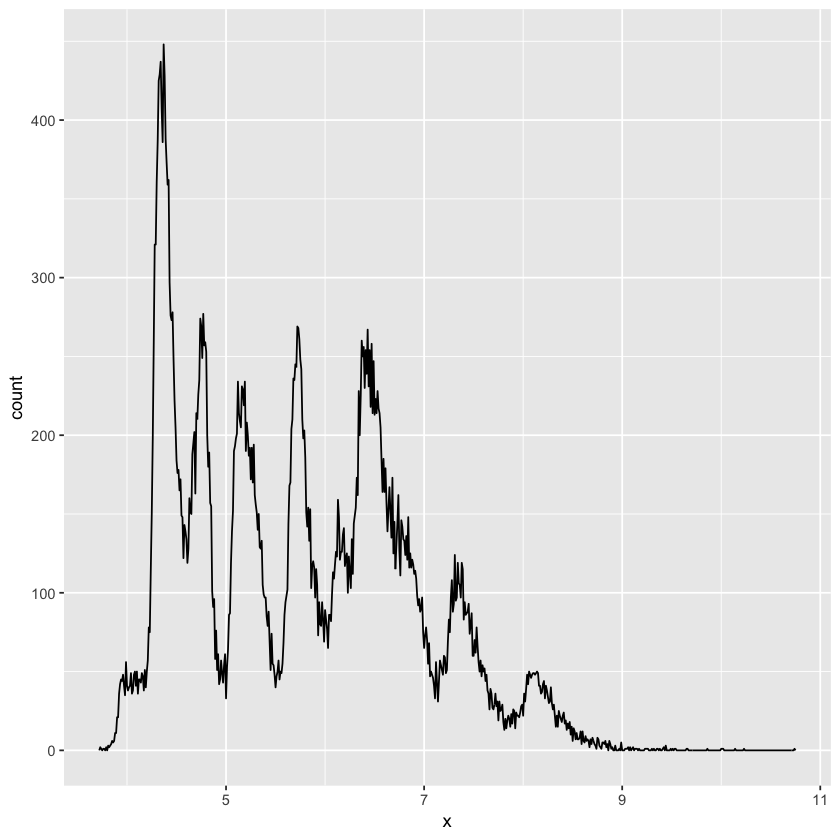

In [3]:
# remove false data points
diamonds <- diamonds %>% filter(2 < y & y < 20 & 2 < x & 2 < z & z < 20)
ggplot(diamonds) +
  geom_freqpoly(aes(x = x), binwidth = 0.01)

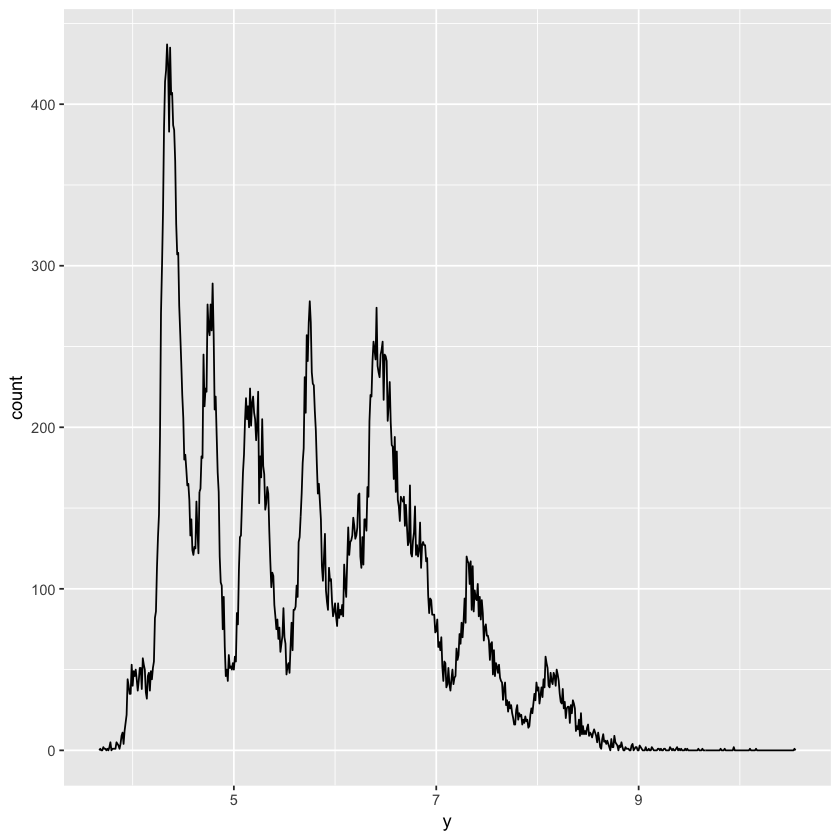

In [4]:
ggplot(diamonds) +
  geom_freqpoly(aes(x = y), binwidth = 0.01)

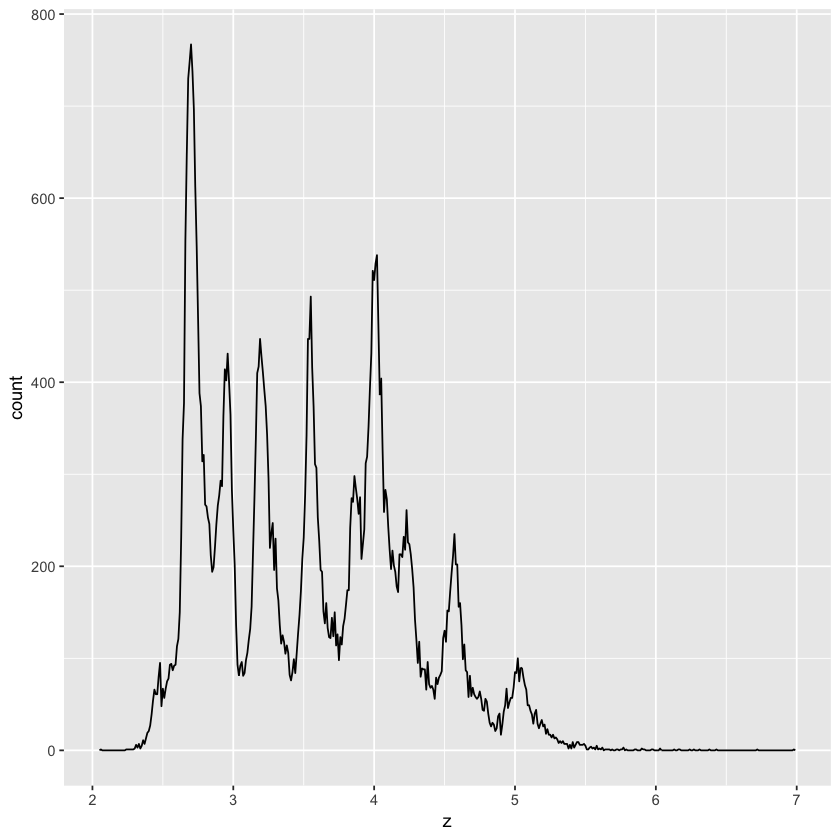

In [5]:
ggplot(diamonds) +
  geom_freqpoly(aes(x = z), binwidth = 0.01)

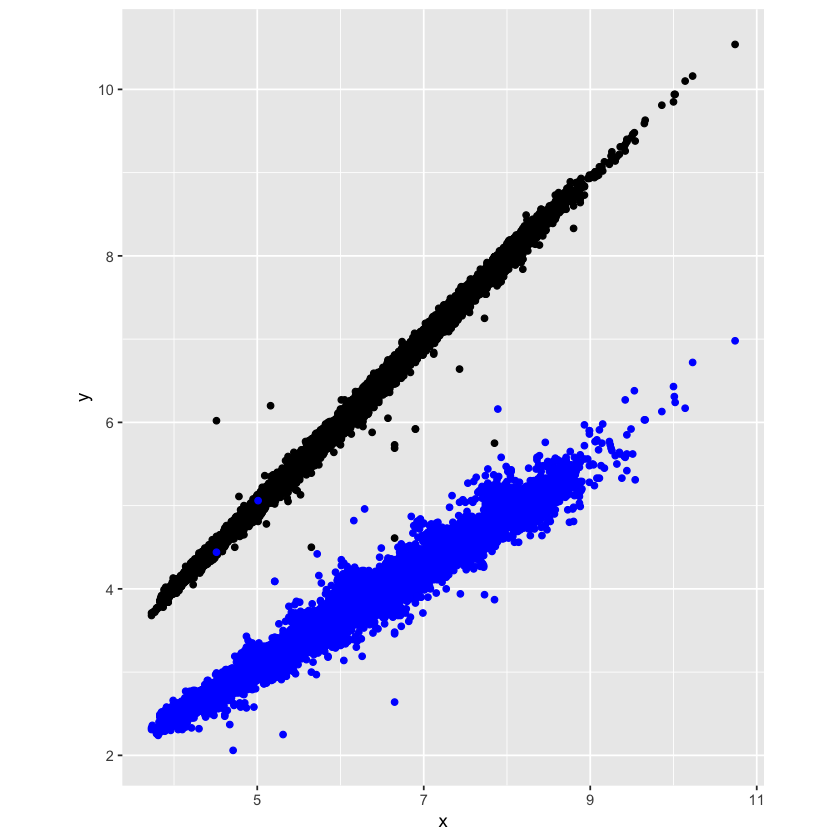

In [6]:
# x and y often share value
ggplot(diamonds) +
  geom_point(aes(x = x, y = y)) +
  geom_point(aes(x = x, y = z), color = "blue") +
  coord_fixed()

Seems like x and y should be length and width, and z is depth.

2. Explore the distribution of price. Do you discover anything unusual or surprising? (Hint: Carefully think about the binwidth and make sure you try a wide range of values.)

Warning message:
“Removed 44207 rows containing non-finite values (stat_bin).”Warning message:
“Removed 2 rows containing missing values (geom_path).”

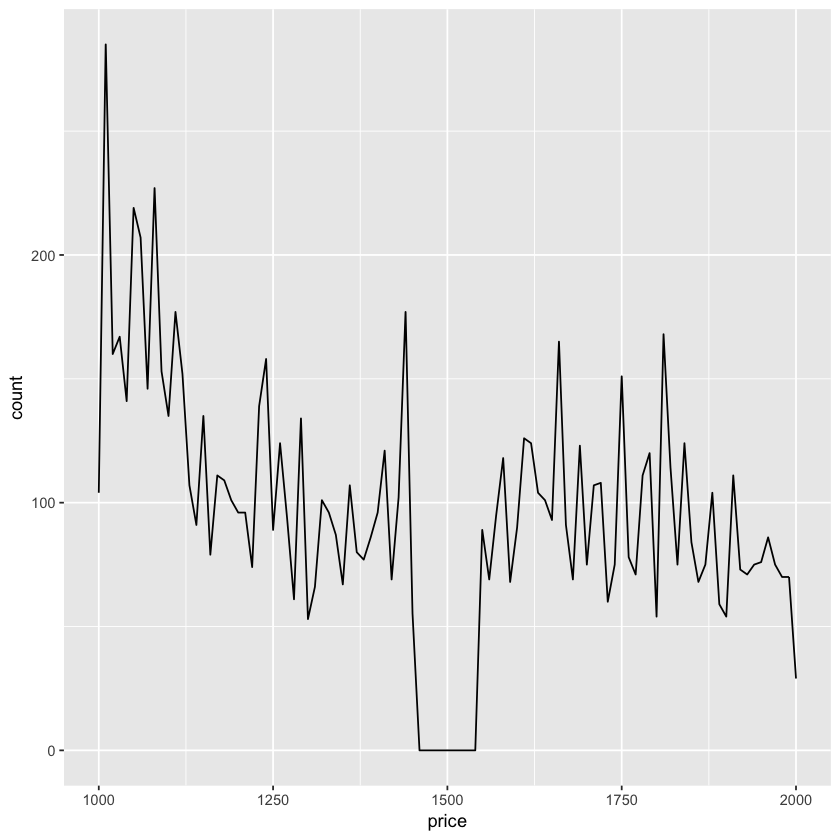

In [7]:
# remove false data points
diamonds <- diamonds %>% filter(2 < y & y < 20 & 2 < x & 2 < z & z < 20)
ggplot(diamonds) + 
  geom_freqpoly(aes(x = price), binwidth = 10) +
  xlim(c(1000, 2000))

Somehow we don’t have diamonds that are priced around $1500.

3. How many diamonds are 0.99 carat? How many are 1 carat? What do you think is the cause of the difference?

In [8]:
diamonds %>% filter(carat == 0.99) %>% count()

n
23


In [9]:
diamonds %>% filter(carat == 1) %>% count()

n
1556


Warning message:
“Removed 48599 rows containing non-finite values (stat_bin).”Warning message:
“Removed 2 rows containing missing values (geom_bar).”

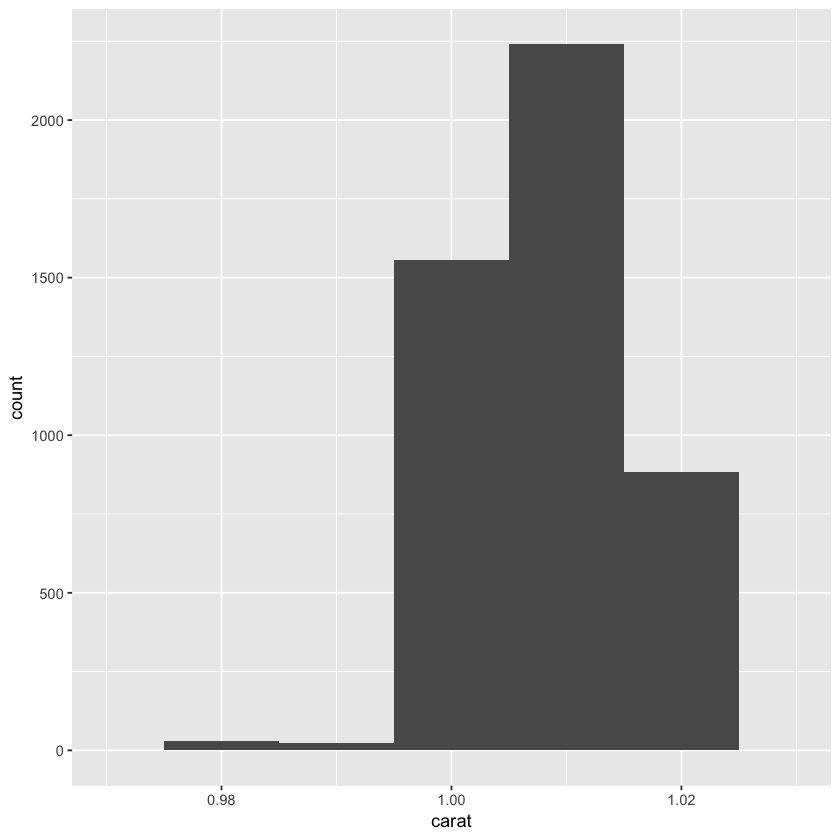

In [10]:
ggplot(diamonds) + 
  geom_histogram(aes(x = carat), binwidth = 0.01) +
  xlim(c(0.97, 1.03))

There are much more diamonds with 1 carat. I think it is because psychologically, 1 carat represent a whole new level from 0.99 carat, so for makers, it is little more material for much more value.

4. Compare and contrast coord_cartesian() vs xlim() or ylim() when zooming in on a histogram. What happens if you leave binwidth unset? What happens if you try and zoom so only half a bar shows?

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 48599 rows containing non-finite values (stat_bin).”Warning message:
“Removed 2 rows containing missing values (geom_bar).”

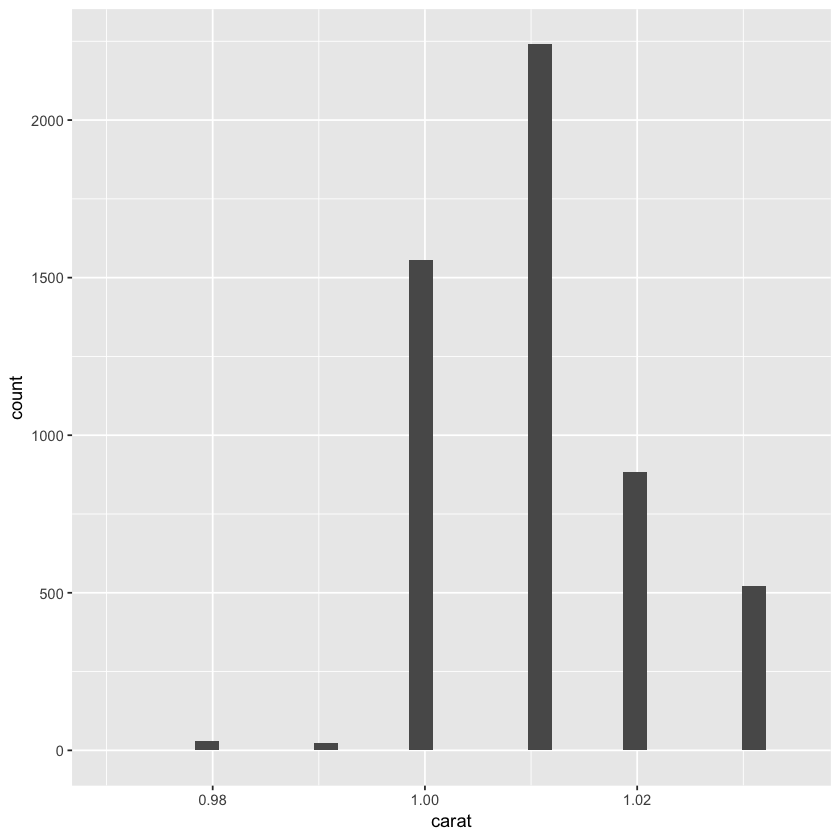

In [11]:
ggplot(diamonds) + 
  geom_histogram(aes(x = carat)) +
  xlim(c(0.97, 1.035))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


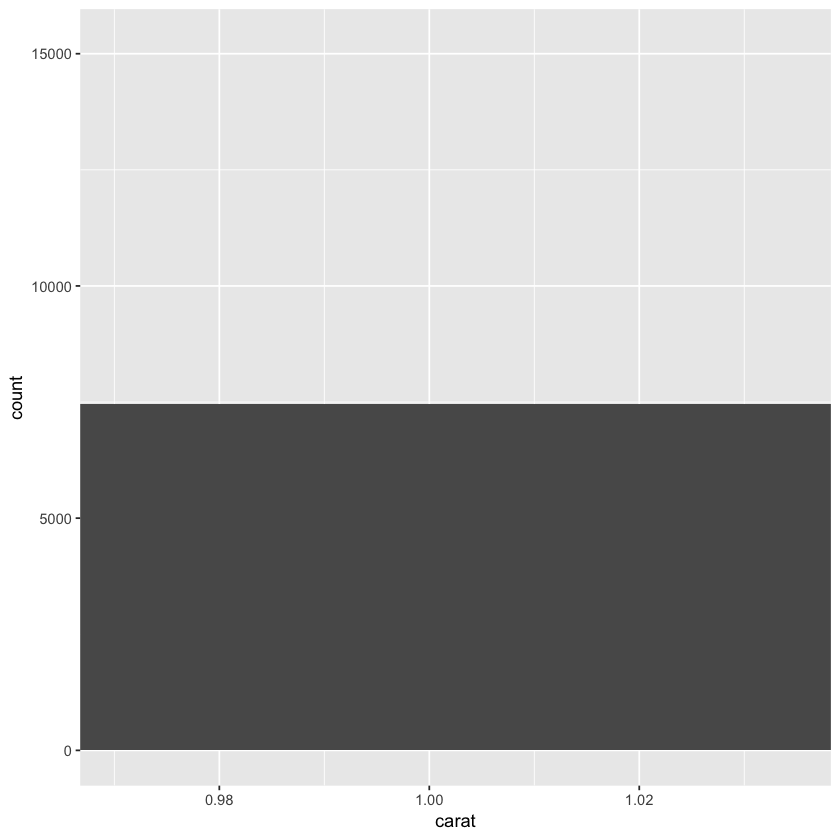

In [12]:
ggplot(diamonds) + 
  geom_histogram(aes(x = carat)) +
  coord_cartesian(xlim = c(0.97, 1.035))

Warning message:
“Removed 48599 rows containing non-finite values (stat_bin).”Warning message:
“Removed 1 rows containing missing values (geom_bar).”

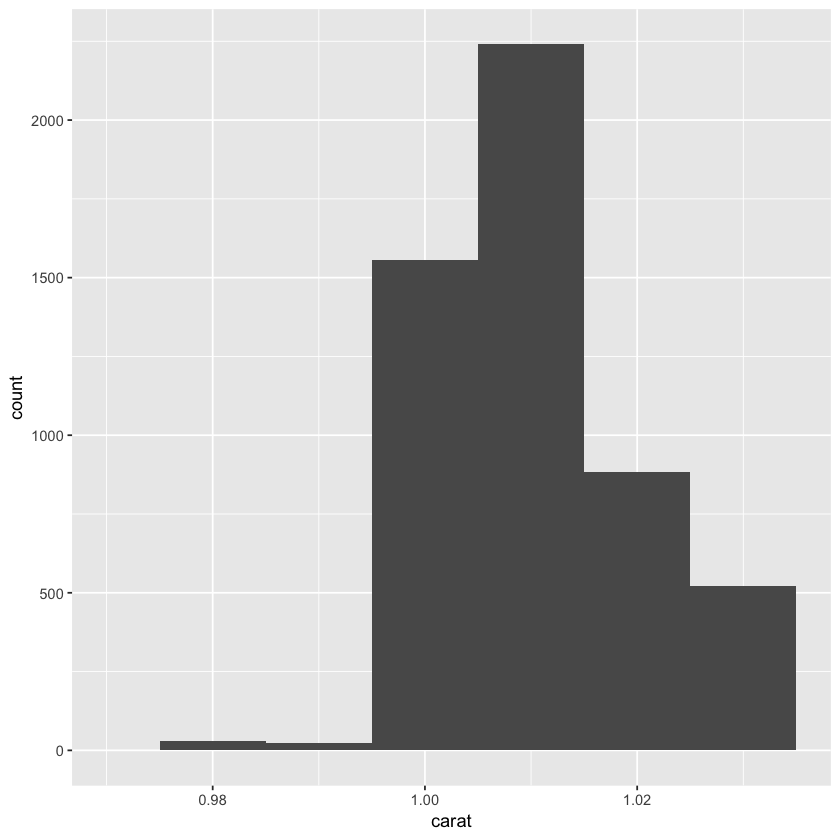

In [13]:
ggplot(diamonds) + 
  geom_histogram(aes(x = carat), binwidth = 0.01) +
  xlim(c(0.97, 1.035))

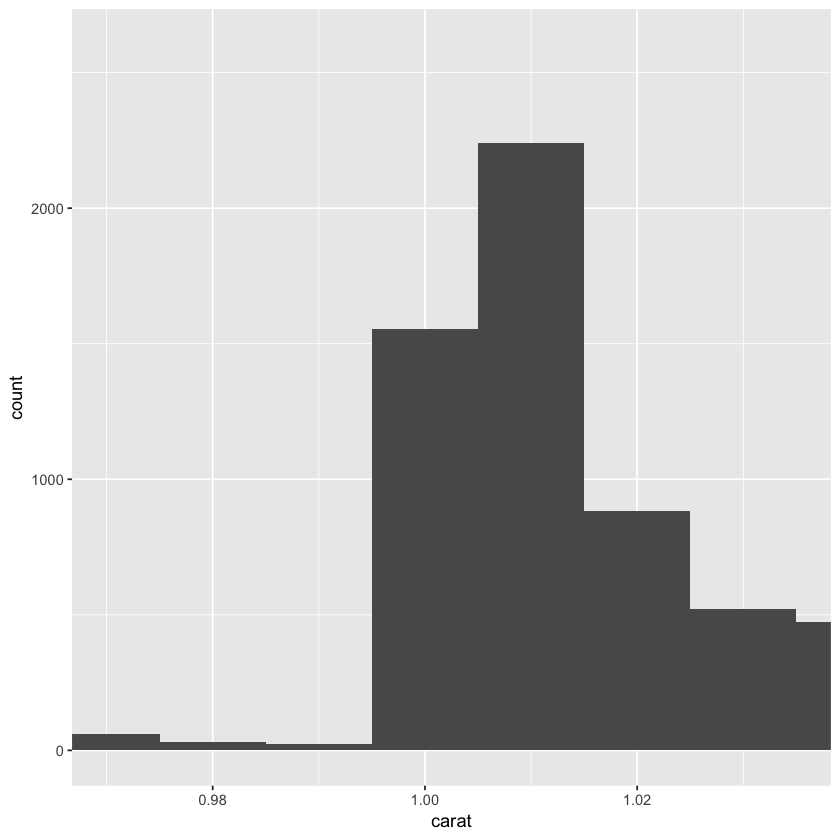

In [14]:
ggplot(diamonds) + 
  geom_histogram(aes(x = carat), binwidth = 0.01) +
  coord_cartesian(xlim = c(0.97, 1.035))

coord_cartesian() plots and cuts, while xlim() cuts and plots. So xlim() does not show the half bar.